In [172]:
import os
os.system('pip install tensorflow==2.3.0')
os.system('pip install transformers==3.0.0')

0

In [118]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [119]:
import sys
import logging

import boto3
from datetime import datetime
from datetime import datetime, timedelta

import math
import random
import numpy as np
import json

from datetime import datetime
import boto3
import json
import pandas as pd
from datetime import datetime, timedelta
import boto3
import warnings
import pandas as pd
import time
import traceback
import warnings

import decimal
from decimal import Decimal
import json

#import pygeohash as geohash

import re
##libraries required
import math
import re
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy
import csv
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import pandas as pd

In [120]:
pdf = pd.read_csv('item-tags-sg-9may.csv')

In [121]:
pdf= pdf[:10000]

In [122]:
pdf.count()

country_id             4995
name                   4998
department_name        4995
sub_department_name    4992
dtype: int64

In [123]:
pdf = pdf.dropna()

In [124]:
pdf = pdf.drop_duplicates()

In [125]:
pdf['department_name'].value_counts()

Snacks                       689
Beverages                    556
Wine, Beers & Spirits        366
Cooking & Condiments         260
Staples & Canned Food        238
Household Goods              236
Instant Food                 230
Health & Wellness            220
Fruits & Vegetables          215
Personal Care                194
Bakery & Breakfast           158
Cakes & Bakes                154
Mother & Baby                151
Beauty & Skincare            141
Pet Supplies                 137
Party, Toys & Games          116
Chilled & Frozen Food         99
Flowers & Gifts               94
Eid al-Fitr                   93
Dairy & Eggs                  92
Meat                          86
Ice Cream & Dessert           81
Fashion & Accessories         63
Seafood                       59
Specialty                     54
TCM & Herbal                  43
Books & Stationery            41
Outdoor & Garden              32
Home & Lifestyle              27
Electronics & Accessories     23
Chinese/HK

In [127]:
pdf['sub_department_name'].value_counts()

Chips & Dips                                 203
Biscuits & Cookies                           176
Spirits                                      134
Noodles                                      125
Beer                                         117
Juices & Shakes                              113
Fresh Fruits                                 112
Soft Drinks                                  109
Candy & Sweets                               104
Condiments & Dressing                        104
Cakes                                        101
Dried Fruits, Nuts & Seeds                    98
Tea                                           94
Fresh Vegetables                              92
Ready Meals                                   90
Coffee                                        84
Salt, Sugar, Spices                           84
Chocolate Products                            81
Asian Drinks                                  78
Vitamins & Supplements                        68
Canned Food         

In [128]:
pdf['sub_department_name'].value_counts()

Chips & Dips                                 203
Biscuits & Cookies                           176
Spirits                                      134
Noodles                                      125
Beer                                         117
Juices & Shakes                              113
Fresh Fruits                                 112
Soft Drinks                                  109
Candy & Sweets                               104
Condiments & Dressing                        104
Cakes                                        101
Dried Fruits, Nuts & Seeds                    98
Tea                                           94
Fresh Vegetables                              92
Ready Meals                                   90
Coffee                                        84
Salt, Sugar, Spices                           84
Chocolate Products                            81
Asian Drinks                                  78
Vitamins & Supplements                        68
Canned Food         

In [129]:
pdf.count()

country_id             4992
name                   4992
department_name        4992
sub_department_name    4992
dtype: int64

In [130]:
pd.options.display.max_rows = 999

In [131]:
pdf = pdf[pdf['sub_department_name'].map(pdf['sub_department_name'].value_counts()) > 1]


# Data Preprocessing

In [132]:
maxlen = 0
maxword = ''
sentences = []
for line in list(pdf['name'].values):
    #print(line.rstrip())
    words = []
    #print(line)
    val = str(line).rstrip().lower()
    words = val.split(' ')
    newval = ''
    for i in words:
        i = i.replace('(','').replace(')','').replace('/','').replace(',','').replace('.','').replace('+','').replace('\'','').replace(' ','')
        i = "".join(filter(lambda x: not x.isdigit(), i))
        newval = newval + i + ' '
        updatedString = newval[0:len(newval) -1 ]
    #val = re.sub('\W+','', val )
    #newwords = []
    #newwords.append(updatedString)
    sentences.append(updatedString)

In [66]:
sentences[0]

'mysore sandal powder'

In [133]:
pdf['name'] = sentences


In [68]:
pdf.tail(100)

,country_id,name,department_name,sub_department_name
9900,4,ivoire white chocolate % cocoa kg,Cooking & Condiments,Baking Supplies
9901,4,girasoli fire roasted tomato mozz and basil,Chilled & Frozen Food,Chilled Cooking Ingredients
9902,4,ayam tuna flakes in sunflower oil g,Staples & Canned Food,Canned Food
9903,4,remedy organic kombucha - apple crisp - ml [-],"Wine, Beers & Spirits",Cider
9904,4,dezhuang spicy pot base,Cooking & Condiments,Stock & Gravy
9905,4,traditional medicinals healthy cycle bags,Beverages,Tea
9906,4,classic beauty,Flowers & Gifts,Bouquets
9907,4,aachi fish fry masala | g,Cooking & Condiments,"Salt, Sugar, Spices"
9908,4,h-two-o original ml,Beverages,Soft Drinks
9909,4,corona extra ml,"Wine, Beers & Spirits",Beer


# DISTIL BERT MULTILABEL CLASSIFICATION

In [134]:
from transformers import TFBertModel , TFDistilBertModel,  DistilBertConfig, DistilBertTokenizer
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalMaxPool1D, Concatenate
from transformers import TFDistilBertMainLayer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,Accuracy,Precision,Recall
from tensorflow.keras.utils import to_categorical
# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [135]:
data = pdf
data.head()

,country_id,name,department_name,sub_department_name
0,4.0,mysore sandal powder,Personal Care,Feminine Care
1,4.0,life alkaline bottle water ph ml,Beverages,Water
2,4.0,ben & jerry choc fud brownie ml [],Ice Cream & Dessert,Ice Cream
3,4.0,nn bobo cooked fishball g pcs i g,Eid al-Fitr,Chilled/Frozen
4,4.0,x tullamore dew original ml,"Wine, Beers & Spirits",Spirits


In [136]:
data['department_name'] = pd.Categorical(data['department_name'])
data['sub_department_name'] = pd.Categorical(data['sub_department_name'])

In [137]:
department_name_dict = dict( enumerate(data['department_name'].cat.categories ) )

In [138]:
department_name_dict

{0: 'Automotive',
 1: 'Bags & Travel',
 2: 'Bakery & Breakfast',
 3: 'Beauty & Skincare',
 4: 'Beverages',
 5: 'Books & Stationery',
 6: 'Cakes & Bakes',
 7: 'Chilled & Frozen Food',
 8: 'Chinese/HK Specialties',
 9: 'Cooking & Condiments',
 10: 'Dairy & Eggs',
 11: 'Eid al-Fitr',
 12: 'Electronics & Accessories',
 13: 'Fashion & Accessories',
 14: 'Flowers & Gifts',
 15: 'Fruits & Vegetables',
 16: 'Health & Wellness',
 17: 'Home & Lifestyle',
 18: 'Household Goods',
 19: 'Ice Cream & Dessert',
 20: 'Instant Food',
 21: 'Meat',
 22: 'Mother & Baby',
 23: 'Outdoor & Garden',
 24: 'Party, Toys & Games',
 25: 'Personal Care',
 26: 'Pet Supplies',
 27: 'Seafood',
 28: 'Seasonal',
 29: 'Snacks',
 30: 'Specialty',
 31: 'Staples & Canned Food',
 32: 'Store Guide',
 33: 'TCM & Herbal',
 34: 'Wine, Beers & Spirits'}

In [139]:
sub_department_name_dict = dict( enumerate(data['sub_department_name'].cat.categories ) )

In [140]:
sub_department_name_dict

{0: 'Accessories for New Mothers',
 1: 'Adult Diapers',
 2: 'Adult Non-Fiction',
 3: 'Air Care',
 4: 'Asian Dessert',
 5: 'Asian Drinks',
 6: 'Automotives',
 7: 'Baby Accessories',
 8: 'Baby Clothes',
 9: 'Baby Diapers',
 10: 'Baby Food & Supplements',
 11: 'Baby Formula (Milk)',
 12: 'Baby Wipes',
 13: 'Bak Kwa',
 14: 'Baking Supplies',
 15: 'Balloons',
 16: 'Bath & Body',
 17: 'Batteries',
 18: 'Beauty Accessories',
 19: 'Beauty Essences',
 20: 'Bedroom',
 21: 'Beer',
 22: 'Birds Nest',
 23: 'Biscuits & Cookies',
 24: 'Bouquets',
 25: 'Boxed Flowers',
 26: 'Brownies',
 27: 'Bundles',
 28: 'Buns & Rolls',
 29: 'Butter & Margarine',
 30: 'Cakes',
 31: 'Candles',
 32: 'Candy & Sweets',
 33: 'Canned Food',
 34: 'Canned Meat & Fish',
 35: 'Canned Soup',
 36: 'Canned Vegetables & Beans',
 37: 'Car Accessories',
 38: 'Cards / Games / Puzzles',
 39: 'Cat Accessories',
 40: 'Cat Food & Treats',
 41: 'Cereals',
 42: 'Champagne & Sparkling Wine',
 43: 'Cheese',
 44: 'Chilled Cooking Ingredients

In [141]:

# Transform your output to numeric
data['department_name'] = data['department_name'].cat.codes
data['sub_department_name'] = data['sub_department_name'].cat.codes


In [142]:
data.head()

,country_id,name,department_name,sub_department_name
0,4.0,mysore sandal powder,25,81
1,4.0,life alkaline bottle water ph ml,4,202
2,4.0,ben & jerry choc fud brownie ml [],19,124
3,4.0,nn bobo cooked fishball g pcs i g,11,45
4,4.0,x tullamore dew original ml,34,186


In [143]:

# Split into train and test - stratify over Issue
data_train, data_test = train_test_split(data, test_size = 0.1, stratify=data['sub_department_name'], random_state=66)

In [144]:
len(data_train)

4477

In [146]:
# Name of the BERT model to use
model_name = 'distilbert-base-multilingual-cased'
# Max length of tokens
max_length = 20
# Load transformers config and set output_hidden_states to False
config = DistilBertConfig.from_pretrained(model_name)
config.output_hidden_states = False
# Load BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
# Load the Transformers BERT model
transformer_model = TFDistilBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [147]:
len(data_train.department_name.value_counts())

35

In [148]:
# Load the MainLayer
bert = transformer_model.layers[0]
# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}
# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[0]

X = GlobalMaxPool1D()(bert_model)

dropout = Dropout(0.2, name='pooled_output')
pooled_output = dropout(X, training=False)

# Then build your model output
department_name = Dense(units=len(data.department_name.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='department_name')(pooled_output)

department_name_dense = Dense(units=796, activation = 'relu', name='department_name_dense')(department_name)


merged = Concatenate()([pooled_output, department_name_dense])

sub_department_name = Dense(units=len(data.sub_department_name.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='sub_department_name')(merged)

outputs = {'department_name': department_name, 'sub_department_name': sub_department_name}
# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')
# Take a look at the model
model.summary()

Model: "BERT_MultiLabel_MultiClass"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 20)]         0                                            
__________________________________________________________________________________________________
distilbert (TFDistilBertMainLay TFBaseModelOutput(la 134734080   input_ids[0][0]                  
__________________________________________________________________________________________________
global_max_pooling1d_1 (GlobalM (None, 768)          0           distilbert[0][0]                 
__________________________________________________________________________________________________
pooled_output (Dropout)         (None, 768)          0           global_max_pooling1d_1[0][0]     
_________________________________________________________________________

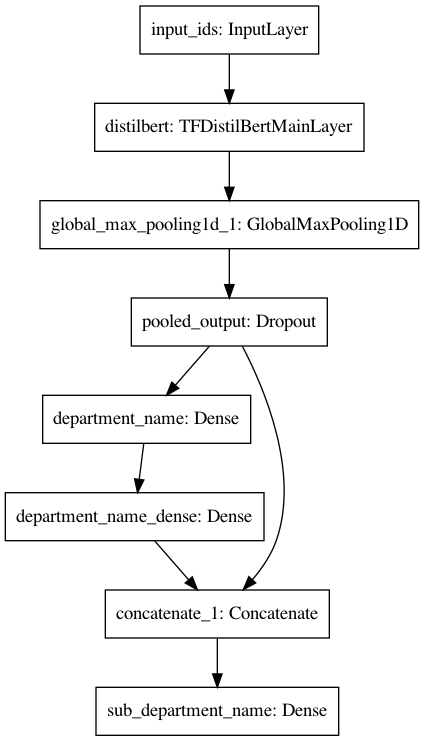

In [152]:
import tensorflow
tf.keras.utils.plot_model(model, to_file='model-img.png')

In [153]:
# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = {'department_name': CategoricalCrossentropy(from_logits = True), 'sub_department_name': CategoricalCrossentropy(from_logits = True)}
metric = {'department_name': [CategoricalAccuracy('accuracy')], 'sub_department_name': [CategoricalAccuracy('accuracy')]}
#metric = {'department_name': [Recall()], 'sub_department_name': [CategoricalAccuracy('accuracy')]}

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [154]:
# Ready output data for the model
y_department_name = to_categorical(data_train['department_name'])
y_sub_department_name = to_categorical(data_train['sub_department_name'])
# Tokenize the input (takes some time)

In [155]:
y_sub_department_name.shape

(4477, 207)

In [156]:
y_department_name.shape

(4477, 35)

In [157]:

x = tokenizer(
    text=data_train['name'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False, 
    verbose=True)

In [158]:
# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids']},
    y={'department_name': y_department_name, 'sub_department_name': y_sub_department_name},
    validation_split=0.05,
    batch_size=64,
    epochs=10)

Epoch 1/10
25/67 [==========>...................] - ETA: 2:19 - loss: 8.2965 - department_name_loss: 3.1987 - sub_department_name_loss: 5.0978 - department_name_accuracy: 0.1494 - sub_department_name_accuracy: 0.0331

KeyboardInterrupt: 

In [159]:
history.history

{'loss': [7.435333728790283,
  5.885434150695801,
  5.155502796173096,
  4.715322971343994,
  4.401061534881592,
  4.159945964813232,
  3.9878854751586914,
  3.8267598152160645,
  3.703209638595581,
  3.6014649868011475],
 'department_name_loss': [2.7889034748077393,
  2.0448830127716064,
  1.723439335823059,
  1.5353087186813354,
  1.4028886556625366,
  1.3026974201202393,
  1.2336026430130005,
  1.1657793521881104,
  1.1175915002822876,
  1.0756747722625732],
 'sub_department_name_loss': [4.646430492401123,
  3.8405508995056152,
  3.4320647716522217,
  3.180013656616211,
  2.998173713684082,
  2.857248306274414,
  2.754282236099243,
  2.6609809398651123,
  2.585618257522583,
  2.525789737701416],
 'department_name_accuracy': [0.24692226946353912,
  0.46347755193710327,
  0.5537577867507935,
  0.5993668437004089,
  0.6381756067276001,
  0.6659631729125977,
  0.6824949979782104,
  0.6959784030914307,
  0.7116895318031311,
  0.7221245169639587],
 'sub_department_name_accuracy': [0.09051

In [90]:
import matplotlib.pyplot as plt
def printGraph(history):
    
    plt.plot(history.history['department_name_accuracy'])
    plt.plot(history.history['val_department_name_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('department_name_accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

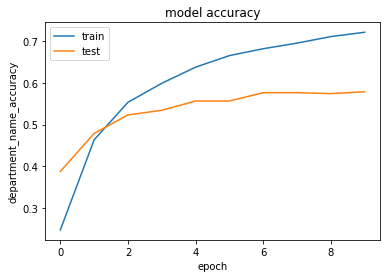

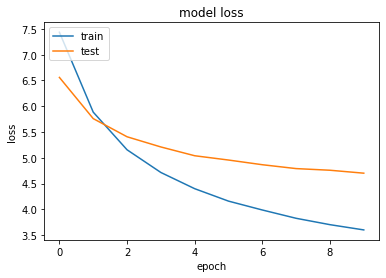

In [91]:
# Print Historical accuracy and Loss
printGraph(history)

In [95]:
model.save('model.h5')

In [97]:
# Test Output
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

# EVALUATE on TEST SET

In [98]:
test_y_department_name = to_categorical(data_test['department_name'])
test_y_sub_department_name = to_categorical(data_test['sub_department_name'])
test_x = tokenizer(
    text=data_test['name'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids']},
    y={'department_name': test_y_department_name, 'sub_department_name': test_y_sub_department_name}
)

32/32 [==============================] - 9s 284ms/step - loss: 4.3034 - department_name_loss: 1.4521 - sub_department_name_loss: 2.8514 - department_name_department_name_accuracy: 0.5862 - sub_department_name_sub_department_name_accuracy: 0.3858


# Test Sample Data 

In [100]:
# Test Output
import tensorflow as tf
from transformers import TFDistilBertModel,  DistilBertConfig, DistilBertTokenizer
model = tf.keras.models.load_model('model.h5')

In [160]:
# Load BERT tokenizer
model_name = 'distilbert-base-multilingual-cased'
# Max length of tokens
max_length = 20
# Load transformers config and set output_hidden_states to False
config = DistilBertConfig.from_pretrained(model_name)
config.output_hidden_states = False
tokenizer = DistilBertTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

In [161]:
#sentence = ['Sosis Ayam Premio 500G']
#sentence = ['Minyak Goreng Kemasan Sofia']
#sentence = ['Pot Bunga Putih Polos No.2']
#sentence = ['Bilberry 50 Kapsul eaeq eewe']
sentence = ['Kentang 3 Kg']

In [162]:
test_x = tokenizer(
    text=sentence,
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)

In [163]:
test_x

{'input_ids': <tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[  101, 19393, 11889,   124,   148, 10240,   102]], dtype=int32)>}

In [164]:
output = model.predict(x={'input_ids': test_x['input_ids']})

In [165]:
import numpy as np
department_name_dict[np.argmax(output['department_name'])]

'Snacks'

In [166]:
sub_department_name_dict[np.argmax(output['sub_department_name'])]

'Chips & Dips'

# VALIDATE MODEL

In [167]:
# Test Output
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')


OSError: SavedModel file does not exist at: model.h5/{saved_model.pbtxt|saved_model.pb}

In [168]:
test_y_department_name = to_categorical(data_test['department_name'])
test_y_sub_department_name = to_categorical(data_test['sub_department_name'])
test_x = tokenizer(
    text=data_test['name'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)



In [169]:
output = model.predict(x={'input_ids': test_x['input_ids']})

In [170]:
department_names = output['department_name']
sub_department_names = output['sub_department_name']

In [171]:

department_name_prediction=[]
department_name_actual = []

sub_department_name_prediction=[]
sub_department_name_actual = []
for i in range(0,len(department_names)):
    department_name_prediction.append(department_name_dict[np.argmax(department_names[i])])
    department_name_actual.append(department_name_dict[data_test['department_name'].values[i]])
for i in range(0,len(sub_department_names)):
    sub_department_name_prediction.append(sub_department_name_dict[np.argmax(sub_department_names[i])])
    sub_department_name_actual.append(sub_department_name_dict[data_test['sub_department_name'].values[i]])

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(department_name_actual, department_name_prediction))

                           precision    recall  f1-score   support

               Automotive       0.00      0.00      0.00         1
            Bags & Travel       0.00      0.00      0.00         1
       Bakery & Breakfast       0.29      0.29      0.29        31
        Beauty & Skincare       0.36      0.40      0.38        30
                Beverages       0.74      0.87      0.80       109
       Books & Stationery       0.00      0.00      0.00         9
            Cakes & Bakes       0.57      0.45      0.50        29
    Chilled & Frozen Food       0.25      0.06      0.09        18
   Chinese/HK Specialties       0.00      0.00      0.00         4
     Cooking & Condiments       0.61      0.62      0.62        58
             Dairy & Eggs       0.53      0.50      0.51        20
              Eid al-Fitr       0.33      0.05      0.09        20
Electronics & Accessories       0.00      0.00      0.00         5
    Fashion & Accessories       0.93      1.00      0.96     

In [114]:
print(classification_report(sub_department_name_actual, sub_department_name_prediction))

                                           precision    recall  f1-score   support

              Accessories for New Mothers       0.00      0.00      0.00         1
                                 Air Care       0.00      0.00      0.00         3
                            Asian Dessert       0.00      0.00      0.00         1
                             Asian Drinks       0.00      0.00      0.00        15
                              Automotives       0.00      0.00      0.00         1
                         Baby Accessories       0.19      0.58      0.29        12
                             Baby Clothes       0.00      0.00      0.00         4
                             Baby Diapers       0.00      0.00      0.00         1
                  Baby Food & Supplements       0.00      0.00      0.00         3
                      Baby Formula (Milk)       0.00      0.00      0.00         1
                               Baby Wipes       0.00      0.00      0.00         2
   